In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [68]:
# ReLu function
def activation_ReLu(value):
    if value > 0:
        return value
    else:
        return 0

# partial derivative of ReLu for the backpropagation
def activation_ReLu_part_deriv(value):
    if value > 0:
        return 1
    else:
        return 0   

In [69]:
# Load the data from .csv file
df = pd.read_csv("medical_insurance.csv")

In [70]:
# The NN can only handle two feature variables, so in this case we take age and bmi
# to predict the target, which is the medical costs/charges for each patient
df = df[["age", "bmi", "charges"]]

In [71]:
# Initialising weights and biases
# Randomizing weights to be floats between -10 and 10, rounded to two decimals

weights = []

for i in range(6):
    weight = round(random.uniform(-10,10), 2)
    weights.append(weight)
    
print(weights)
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]
w4 = weights[3]
w5 = weights[4]
w6 = weights[5]
# Biases
bias1 = 0.5
bias2 = 0
bias3 = 0.5

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# learning rate
LR = 0.001
epochs = 300

# Using the previously defined function to generate data instead
data = list(df.values)

# Let's scale our values with min/max -scaling
data=(data - np.min(data))/(np.max(data)-np.min(data))

# Points for plotting loss later
loss_points = []

for epoch in range(epochs):

    epoch_losses = []

    for row in data:
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]
        # Forward pass
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        predicted_value = node_3_output
        # This will probably crash if the loss value gets too high
        # replace with Numpy64 if needed
        loss = (predicted_value - true_value) ** 2

        epoch_losses.append(loss)

        # Back propagation - last layer
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # Back propagation - next layer
        # From this point the chain rule is needed

        # Weights 1 to 4:
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # Biases 1 and 2:
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # Updating the weights and biases
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    average_loss = sum(epoch_losses) / len(epoch_losses)
    # after each epoch, print the current weights and biases
    loss_points.append(average_loss)
    print(f"Epoch: {epoch +1}, loss = {average_loss}")

print("--------------------------")
print("ORIGINAL WEIGHTS/BIASES:\n")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

# IDEA: have a small amount of epochs
# but print the current weights after each epoch
# can you see a certain development in certain
# weights and biases? discuss.
print("--------------------------")
print("FINAL WEIGHTS/BIASES:\n")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

# sometimes, if starting weights and biases
# are large and completely far from each other
# the neural network seems to emphasize
# only one side of the neural network
# this implies a question, does e.g. TensorFlow
# alternate the order of weight calculates from epoch to epoch
# in order to utilize all the weights etc. more?

[-6.26, -6.52, 8.22, 2.26, -0.74, 9.71]
Epoch: 1, loss = 0.036687702417305436
Epoch: 2, loss = 0.03635325360331389
Epoch: 3, loss = 0.03635324481022958
Epoch: 4, loss = 0.03635323729455889
Epoch: 5, loss = 0.036353229782456524
Epoch: 6, loss = 0.036353222273837464
Epoch: 7, loss = 0.036353214768700015
Epoch: 8, loss = 0.036353207267042255
Epoch: 9, loss = 0.03635319976886215
Epoch: 10, loss = 0.03635319227415806
Epoch: 11, loss = 0.0363531847829279
Epoch: 12, loss = 0.036353177295169896
Epoch: 13, loss = 0.03635316981088225
Epoch: 14, loss = 0.03635316233006294
Epoch: 15, loss = 0.03635315485271024
Epoch: 16, loss = 0.03635314737882207
Epoch: 17, loss = 0.03635313990839672
Epoch: 18, loss = 0.03635313244143236
Epoch: 19, loss = 0.03635312497792695
Epoch: 20, loss = 0.03635311751787871
Epoch: 21, loss = 0.036353110061285866
Epoch: 22, loss = 0.036353102608146344
Epoch: 23, loss = 0.03635309515845852
Epoch: 24, loss = 0.03635308771222028
Epoch: 25, loss = 0.03635308026942996
Epoch: 26, l

<function matplotlib.pyplot.show(close=None, block=None)>

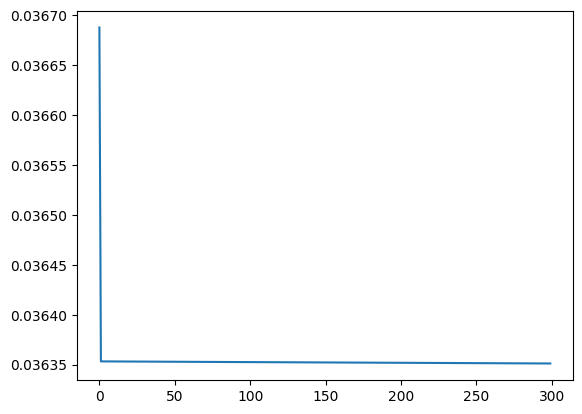

In [72]:
plt.plot(loss_points)
plt.show

In [73]:
# prediction is basically just doing the forward 
# pass again (but only that)
def predict(x1, x2):
    # NODE 1 OUTPUT
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    node_1_output

    # NODE 2 OUTPUT
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)
    node_2_output

    # NODE 3 OUTPUT 
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    node_3_output

    return node_3_output

<h5>Since we scaled everything, testing the values is a bit tricky</h5>

In [74]:
# get a test row in original values:
df.iloc[0:1]

,age,bmi,charges
0,19,27.9,16884.924


In [75]:
 # get the same row in scaled version
# you can google for decimal formats, for example:
# "4.76829326e-05 in decimal format"
data[0]

array([4.76829326e-05, 1.87280992e-04, 2.64592656e-01])

In [76]:
# x1 = 0.00004768293 (19 years of age)
# x2 = 0.00018728099 (27.9 BMI)
# y/target = 0.264592656 (16884.924)

In [77]:
# output with scaled values is this
# if you multiply this with the MAX value of charges, 
# you get USD value
predict(0.00004768293, 0.00018728099)

0.2072503710894834

In [78]:
 # get the USD value
df['charges'].max() * predict(0.00004768293, 0.00018728099)

13216.444869607687

In [79]:
df.corr()

,age,bmi,charges
age,1.000000,0.113048,0.298624
bmi,0.113048,1.000000,0.199846
charges,0.298624,0.199846,1.000000
